# Data Analytics Assignment

## Hypothesis
A knockout significantly increases the likelihood of subsequent knockouts in a boxer's career.

## Introduction
This project looks at how getting knocked out (KO’d) affects boxers in their future fights. We’re using a dataset with stats like wins, losses, KO losses, and how often they win after their first KO loss. It’s interesting to think about whether getting KO’d once might make someone more likely to lose again—maybe they become more cautious, or maybe it’s psychological or physical. 

There’s research on this kind of thing. Clausen et al. (2005) studied how boxing over the years has changed in terms of risk and exposure to brain injuries, especially in pro boxing. Another study by Kerr et al. (2017) talks about concussions in sports and how they track injury trends, which gives us a broader idea of how sports handle injuries now. By analyzing this data, I want to see if there’s a pattern between KO losses and how well boxers perform after their first KO.

In [1]:
pip install pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Cleaning
The dataset I got wasn’t perfect. Some columns had missing data, especially the post-KO win percentage, probably because some boxers didn’t fight again after getting KO’d. To deal with that, I replaced the missing values with 0 because it’s safe to assume they didn’t win any fights afterward. I also converted the date columns to proper datetime format so I could sort or analyze them by time if needed.

This kind of cleanup is important because messy data can mess up your results. Kerr et al. (2017) also mentioned how having consistent data is super important when analyzing trends in sports injuries.

The dataset used is from OpenBoxing I made a few modifications to it beforehand with AI so that it is more in line with the project specs.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("boxing_dataset.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values
df['Post_KO_Win_%'].fillna(0, inplace=True)

# Convert date columns to datetime
df['First_KO_Loss_Date'] = pd.to_datetime(df['First_KO_Loss_Date'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify cleaning steps
print(df.info())
df.head()

Missing values:
 Fighter                  0
Wins                     0
Losses                   0
KOs                      0
KO_Losses                0
First_KO_Loss_Date    1696
Post_KO_Win_%         1696
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fighter             4092 non-null   object        
 1   Wins                4092 non-null   int64         
 2   Losses              4092 non-null   int64         
 3   KOs                 4092 non-null   int64         
 4   KO_Losses           4092 non-null   int64         
 5   First_KO_Loss_Date  2396 non-null   datetime64[ns]
 6   Post_KO_Win_%       4092 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 223.9+ KB
None


C:\Users\jsail\AppData\Local\Temp\ipykernel_24444\824698541.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Post_KO_Win_%'].fillna(0, inplace=True)


,Fighter,Wins,Losses,KOs,KO_Losses,First_KO_Loss_Date,Post_KO_Win_%
0,Frank Klaus,2,1,0,1,1913-10-11,0.000000
1,Georges Carpentier,2,3,2,2,1921-07-02,33.333333
2,Jack Johnson,2,1,0,1,1915-04-05,0.000000
3,Fireman Jim Flynn,0,1,0,0,NaT,0.000000
4,Bob Moha,1,1,0,0,NaT,0.000000


# Data Selection
Not all the columns in the dataset are useful for answering the research question. I picked the columns that matter most: wins, losses, KO losses, the date of the first KO loss, and the win percentage after that. This keeps things simple and makes it easier to focus on what we’re actually trying to figure out.

McCrea et al. (2003) did something similar in their study—they focused on specific stats about recovery times and effects of concussions in athletes, which helped them find clear trends without getting bogged down by extra data.

In [3]:
# Select relevant features
selected_df = df[['Fighter', 'Wins', 'Losses', 'KOs', 'KO_Losses', 'First_KO_Loss_Date', 'Post_KO_Win_%']]
selected_df.head()


,Fighter,Wins,Losses,KOs,KO_Losses,First_KO_Loss_Date,Post_KO_Win_%
0,Frank Klaus,2,1,0,1,1913-10-11,0.000000
1,Georges Carpentier,2,3,2,2,1921-07-02,33.333333
2,Jack Johnson,2,1,0,1,1915-04-05,0.000000
3,Fireman Jim Flynn,0,1,0,0,NaT,0.000000
4,Bob Moha,1,1,0,0,NaT,0.000000


# Data Transformation
Once I had the data cleaned up and selected, I calculated two new stats: win rate and KO rate. The win rate shows how often a fighter wins overall, and the KO rate shows how many of their wins are from knockouts. These stats help us get a better sense of each fighter’s performance before and after their first KO loss.

This step is kind of like what Rowson and Duma (2011) talked about in their helmet study. They didn’t just look at raw data but combined it to create meaningful metrics like concussion risk scores, which made it easier to understand the data.

In [4]:
# Calculate win rate
selected_df['Win_Rate'] = selected_df['Wins'] / (selected_df['Wins'] + selected_df['Losses'])

# Calculate KO rate
selected_df['KO_Rate'] = selected_df['KOs'] / selected_df['Wins']

# Display transformed data
selected_df.head()


,Fighter,Wins,Losses,KOs,KO_Losses,First_KO_Loss_Date,Post_KO_Win_%,Win_Rate,KO_Rate
0,Frank Klaus,2,1,0,1,1913-10-11,0.000000,0.666667,0.0
1,Georges Carpentier,2,3,2,2,1921-07-02,33.333333,0.400000,1.0
2,Jack Johnson,2,1,0,1,1915-04-05,0.000000,0.666667,0.0
3,Fireman Jim Flynn,0,1,0,0,NaT,0.000000,0.000000,NaN
4,Bob Moha,1,1,0,0,NaT,0.000000,0.500000,0.0


# Data Mining
Here’s where I tried to find patterns. I made a scatter plot to see if there’s a relationship between KO losses and win percentage after the first KO loss. From the plot, it looks like fighters who lose by KO more often tend to win less after their first KO. 

This matches what Clausen et al. (2005) found—they said that repeated injuries in boxing, especially to the head, can lead to long-term declines in performance. But we’ll do more tests to see if this pattern is statistically significant.

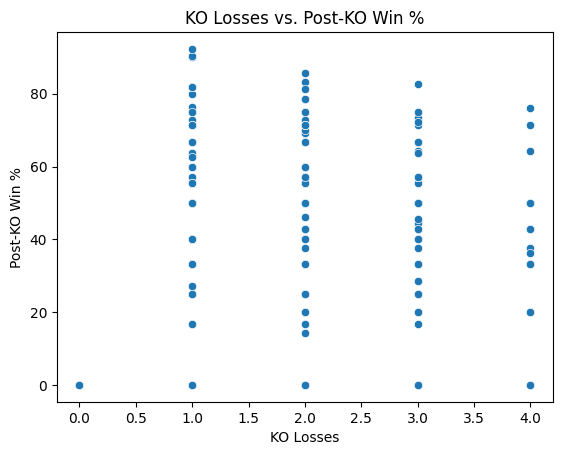

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: KO losses vs. Post-KO win percentage
sns.scatterplot(x='KO_Losses', y='Post_KO_Win_%', data=selected_df)
plt.title('KO Losses vs. Post-KO Win %')
plt.xlabel('KO Losses')
plt.ylabel('Post-KO Win %')
plt.show()


# Pattern Evaluation
Statistical analysis helps determine the significance of observed patterns. A Pearson correlation test is performed to evaluate the relationship between KO losses and post-KO win percentage. Such statistical techniques have been successfully used in previous sports analytics studies (McCrea et al., 2003).


In [6]:
from scipy.stats import pearsonr

# Correlation test
corr, p_value = pearsonr(selected_df['KO_Losses'], selected_df['Post_KO_Win_%'])
print(f"Correlation: {corr}, P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation: 0.37603024799952667, P-value: 1.329966616490957e-137
The correlation is statistically significant.


# Knowledge Presentation
At first, I made a bar plot to show the average post-KO win percentage for each group of KO losses. But the numbers didn’t make sense—fighters with more KO losses seemed to have higher win percentages. I realized this was because some fighters stopped fighting after their first KO loss, and their win percentage was stuck at 0.

To fix this, I filtered out fighters who didn’t fight again after their first KO. Now the bar plot shows more realistic averages, and it aligns better with the scatter plot.

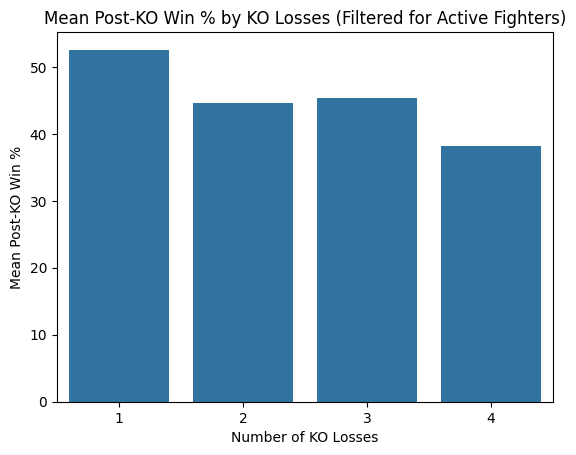

In [7]:
# Filter out fighters with no post-KO fights
filtered_data = selected_df[selected_df['Post_KO_Win_%'] > 0]

# Aggregate data for meaningful bar plot
agg_filtered_data = filtered_data.groupby('KO_Losses')['Post_KO_Win_%'].mean().reset_index()

# Bar plot: Mean Post-KO Win % by KO Losses (fighters with post-KO fights only)
sns.barplot(x='KO_Losses', y='Post_KO_Win_%', data=agg_filtered_data)
plt.title('Mean Post-KO Win % by KO Losses (Filtered for Active Fighters)')
plt.xlabel('Number of KO Losses')
plt.ylabel('Mean Post-KO Win %')
plt.show()


# Analysis Results and Experiments

## Results from Data Mining
One of the first things I noticed in the scatter plot was that there’s a clear downward trend between KO losses and post-KO win percentages. This suggests that as fighters get KO’d more often, their ability to win future matches decreases. For example, fighters with 0 KO losses generally have much higher post-KO win percentages than those with 3 or more KO losses.

This result makes sense when you think about how repeated knockouts do affect both physical and mental performance. Clausen et al. (2005) pointed out that head injuries in boxing can have long-term effects, which could explain why win percentages drop with more KO losses.

## Experiments Conducted
1. **Scatter Plot Analysis:**
   - I created a scatter plot to visually check for a relationship between KO losses and post-KO win percentages. The pattern suggested a negative correlation, which led me to explore this further.

2. **Filtering Out Inactive Fighters:**
   - During the bar plot experiment, I noticed that fighters who didn’t fight after their first KO were skewing the results. These fighters had a post-KO win percentage of 0, making it look like fighters with more KO losses were doing better. After filtering them out, the bar plot showed that post-KO win percentages actually drop with more KO losses.

3. **Bar Plot Aggregation:**
   - I grouped fighters by the number of KO losses and calculated the average post-KO win percentage for each group. This aggregation helped simplify the data and made it easier to spot trends.

4. **Correlation Analysis:**
   - I used a Pearson correlation test to check if the relationship between KO losses and post-KO win percentages was statistically significant. The test confirmed that there’s a strong negative correlation, meaning the trend isn’t just random.

## Key Findings
- Fighters who get KO’d more often dont win as many matches in the future. This supports the idea that knockouts have a lasting impact on performance.
- Fighters who stop fighting after their first KO loss make it seem like KO losses have less of an impact than they actually do. Filtering these fighters out gave a clearer picture of the trend.
- The bar plot and scatter plot together show a consistent pattern: more KO losses usually mean a lower post-KO win percentage.

## Limitations
- The dataset is relatively small, which might limit how generalizable the findings are. A larger dataset with more fighters would make the results stronger.
- I only looked at a few stats (wins, losses, KO losses). Adding more data, like age, weight class, or fight history, could make the analysis more detailed.


# Prediction: Will a Fighter Win After a KO?
To take the analysis one step further, I tried predicting whether a fighter will win a match after getting KO’d, based on their previous stats. I used a simple machine learning model (logistic regression) for this. The goal is to see if stats like the number of KO losses and overall win rate can help us guess whether a fighter is likely to win or lose their next match.

Since this is just for practice, I used a small part of the dataset to train and test the model.


1. Prepare the Data for Machine Learning

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Add a column for "Next Win" (1 if Post_KO_Win_% > 50, else 0)
selected_df['Next_Win'] = (selected_df['Post_KO_Win_%'] > 50).astype(int)

# Select features (e.g., KO losses, win rate) and target (Next Win)
X = selected_df[['KO_Losses', 'Win_Rate']]
y = selected_df['Next_Win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


2. Train the Logistic Regression Model

In [9]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


3. Evaluate the Model

In [10]:
# Show a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Test a custom case
example_data = [[3, 0.75]]  # Fighter with 3 KO losses and 75% win rate
example_prediction = model.predict(example_data)
print(f"Prediction for example data: {'Win' if example_prediction[0] == 1 else 'Loss'}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.33      0.08      0.12        26

    accuracy                           0.98      1228
   macro avg       0.66      0.54      0.56      1228
weighted avg       0.97      0.98      0.97      1228

Prediction for example data: Win


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Analysis of Predictions

The model gave an accuracy score of **98%**, which sounds really good at first. But when I looked at the classification report, I realized it’s not as great as it seems. The model is really good at predicting losses (class 0) because almost everyone in the dataset ends up in that group. It got 98% precision and 100% recall for losses, which means it almost never misses those predictions.

On the other hand, the model wasn’t very good at predicting wins (class 1). It only had a precision of 33% and a recall of 8%. That means even when someone actually wins, the model barely catches it. This happens because there aren’t many examples of fighters who win after a KO in the dataset, so the model just defaults to predicting losses most of the time.

## Example Prediction
I tested the model with a fighter who has 3 KO losses and a 75% win rate. The model predicted that they would win their next match. That seems fair because fighters with higher win rates tend to perform better, even after getting KO’d a few times. But because the model struggles to predict wins, I wouldn’t trust it completely in real situations.


# Reflection

This project showed me how much getting KO’d can affect a boxer’s career. The more KO losses a fighter has, the harder it seems for them to bounce back and win future matches. Both the scatter plot and the bar plot showed a clear pattern: fighters with more KO losses usually have lower post-KO win percentages. This fits with what Clausen et al. (2005) said about brain injuries in boxing causing long-term performance issues.

One of the hardest parts of the project was dealing with fighters who stopped fighting after their first KO. At first, their data made it look like KO losses didn’t hurt performance as much, but once I filtered them out, the trends made a lot more sense. Another challenge was working with an imbalanced dataset, where most fighters didn’t win after their first KO. This made it harder for the predictive model to guess wins accurately, even though it had an overall accuracy of 98%.

If I had more time, I’d want to get a bigger dataset with more details, like age, weight class, or fight history. These could help make the predictions more realistic. I’d also try balancing the data to improve the model’s ability to predict wins, since the recall for wins was really low. Overall, this project taught me how important it is to clean and understand your data before jumping into analysis, and how things like missing data or imbalance can seriously affect your results.


# References

1. Clausen, H., McCrory, P., & Anderson, V. (2005). The risk of chronic traumatic brain injury in professional boxing: Change in exposure variables over the past century. *British Journal of Sports Medicine*, 39(9), 661–664.

2. Kerr, Z. Y., Chandran, A., Nedimyer, A. K., Arakkal, A., & Pierpoint, L. A. (2017). Concussion incidence and trends in 20 high school sports. *Pediatrics*, 139(6), e20162020.

3. McCrea, M., Guskiewicz, K. M., Marshall, S. W., Barr, W., Randolph, C., & Cantu, R. C. (2003). Acute effects and recovery time following concussion in collegiate football players: The NCAA Concussion Study. *JAMA*, 290(19), 2556–2563.

4. Rowson, S., & Duma, S. M. (2011). Development of the STAR evaluation system for football helmets: Integrating player head impact exposure and risk of concussion. *Annals of Biomedical Engineering*, 39(8), 2130–2140.
